In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Song File

In [2]:
songs_file = pd.read_csv('kaggle/kaggle_songs.txt', sep=' ', header=None)

In [3]:
# songs_file.columns = ['user_id', 'listen_count']

In [4]:
songs_file.head(3)

,0,1
0,SOAAADD12AB018A9DD,1
1,SOAAADE12A6D4F80CC,2
2,SOAAADF12A8C13DF62,3


In [5]:
len(songs_file)

386213

# User File

In [6]:
users_file = pd.read_csv('kaggle/kaggle_users.txt', header=None)

In [7]:
len(users_file)

110000

In [8]:
users_file.columns = ['user_id']

In [9]:
users_file.head(3)

,user_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4


# Triplets File

In [10]:
triplets_file = pd.read_csv('kaggle/kaggle_visible_evaluation_triplets.txt', sep='\t', header=None)

In [11]:
len(triplets_file)

1450933

In [12]:
triplets_file.columns = ['user_id', 'song_id', 'listen_count']

In [13]:
triplets_file.head(3)

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1


In [14]:
len(triplets_file['user_id'].value_counts())

110000

# Track File

In [15]:
tracks_file = pd.read_csv('kaggle/unique_tracks.txt', sep='<SEP>', header=None, 
                          names=['track_id', 'song_id', 'artist_name', 'release'])
tracks_file.head()

<ipython-input-15-3609792675ed>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tracks_file = pd.read_csv('kaggle/unique_tracks.txt', sep='<SEP>', header=None,


,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [16]:
len(tracks_file)

1000000

In [17]:
tracks_file_cleaned = tracks_file.drop(['track_id'], axis=1)
tracks_file_cleaned.head()

,song_id,artist_name,release
0,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


## Check for Duplicates and Missing values

In [18]:
print("Null values in Triplets file :", sum(triplets_file.isnull().any()))
print("Null values in trackes file :", sum(tracks_file.isnull().any()))

Null values in Triplets file : 0
Null values in trackes file : 1


- No Null values in triplets file
- Only one Null value in tracks file

In [19]:
print("Duplicate values in triplets file :", sum(triplets_file.duplicated()))
print("Duplicate values in trackes file :", sum(tracks_file.duplicated()))

Duplicate values in triplets file : 0
Duplicate values in trackes file : 0


- No duplicate rows in triplates data
- No duplicate rows in trackes data

# Merge Files

In [59]:
dataset = pd.merge(triplets_file, tracks_file_cleaned.drop_duplicates(['song_id']), on='song_id', how='left')
dataset.head()

,user_id,song_id,listen_count,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [60]:
print("Length of the dataset :", len(dataset))

Length of the dataset : 1450933


In [61]:
print("Duplicate values in songID :", sum(dataset['song_id'].duplicated()))
print("Duplicate values in userID :", sum(dataset['user_id'].duplicated()))

Duplicate values in songID : 1287727
Duplicate values in userID : 1340933


In [62]:
print("Unique User ID's :", dataset['user_id'].nunique())
print("Unique Song ID's :", dataset['song_id'].nunique())
print("Unique Artist :", dataset['artist_name'].nunique())
print("Unique Release :", dataset['release'].nunique())

Unique User ID's : 110000
Unique Song ID's : 163206
Unique Artist : 28361
Unique Release : 137622


- Total userID's is less than the total songID's. And we have seen earlier that user ID also has duplicate values. So one user has multiple entries with different song ID's.
- Total Song ID's is greater than total artists. that means one artist makes a multiple songs

In [276]:
unique_song_ids = dataset['song_id'].nunique()
unique_user_ids = dataset['user_id'].nunique()
unique_artist = dataset['artist_name'].nunique()

## 1. Most Popular Songs? (Maximum Listen Count)

In [92]:
each_song_listen_freq = dataset.groupby(['song_id']).sum()
each_song_listen_freq.head()

,listen_count
song_id,
SOAAAFI12A6D4F9C66,2
SOAAAGK12AB0189572,2
SOAAAGQ12A8C1420C8,90
SOAAAMT12AB018C9C4,1
SOAAAQN12AB01856D3,2


In [284]:
unique_song_ids

163206

In [137]:
sorted_each_song_listen_freq = each_song_listen_freq.sort_values('listen_count')
sorted_each_song_listen_freq.head(10000)

,listen_count
song_id,
SOQXGJQ12AB01848B2,1
SOFAAZY12A8C145E3F,1
SOFABAD12AB018C65E,1
SOFABBZ12A8C141140,1
SOORMZQ12A6D4F5D8D,1
...,...
SOENAVO12AC468E467,1
SOPTXFD12AB018ACEC,1
SOPTXBS12A8C134AC6,1


We can see here that more than 10,000 songs has listen only one time

In [232]:
top_popular_songs = sorted_each_song_listen_freq.tail(377)
top_popular_songs

,listen_count
song_id,
SOELOOM12AB017DB4C,1004
SOFDJSB12AB0183B5B,1010
SOBOSGD12A6D4F75C0,1013
SOBNCNF12A8C13F62E,1014
SOLPVAQ12AB017EB35,1015
...,...
SOEGIYH12A6D4FC0E3,17115
SOFRQTD12A81C233C0,19454
SOSXLTC12AF72A7F54,24359


In [237]:
quotient = len(top_popular_songs)/unique_song_ids
percentage = quotient*100
print(percentage)

0.23099640944573116


* So there is only <b>0.23</b> percent songs has more than 1000 listen count
* total 377 songs out of 1,63,206 songs has more than 1000 listen count.

## 2. What is the average listen count range for each songs?

In [251]:
sorted_each_song_listen_freq.value_counts().sort_values(ascending=False).head(50)

listen_count
1               41277
2               19607
3               12063
4                8323
5                8257
6                6259
7                4843
8                4019
9                3406
10               3314
11               2797
12               2485
13               2252
14               1925
15               1811
16               1761
17               1545
18               1418
19               1323
20               1221
21               1164
22               1045
23               1016
24                920
25                902
26                802
27                794
29                710
28                699
30                670
31                624
32                600
33                592
34                521
35                510
36                502
38                499
39                460
37                442
40                431
43                387
42                385
41                380
44                379
45                3

In [189]:
sum_of_most_listen_songs = sorted_each_song_listen_freq['listen_count'].value_counts().sort_values(ascending=False).head(50).sum()
sum_of_most_listen_songs

147201

In [192]:
quotient = sum_of_most_listen_songs/unique_song_ids
percentage = quotient*100
print(percentage)

90.19337524355721


- Total unique songs is 1,63,206 and 1,47,201 songs listen between 0-50 times.
- <b>We can say that 90% of songs listen between 0-50 times.</b>

C:\Users\newpa\anaconda3\envs\recommendation-system\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='listen_count', ylabel='Density'>

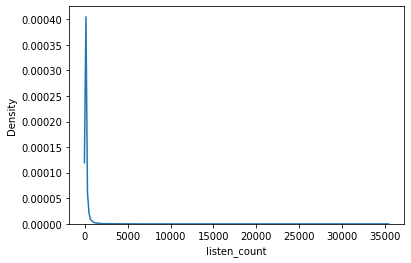

In [141]:
sns.distplot(sorted_each_song_listen_freq['listen_count'], hist=False, bins=20)

- Most of the songs has listen count between 0-50
- Very few songs has greater than 50 listen count.

## 3. Which song is most listened by user?

In [151]:
songs_per_user = dataset.groupby(by=['user_id', 'song_id']).sum()

In [152]:
songs_per_user.head(20)

listen_count
user_id                                  song_id                         
00007a02388c208ea7176479f6ae06f8224355b3 SOAITVD12A6D4F824B             3
                                         SOJTNQQ12AF72A246E             2
                                         SONGABP12A8C1442D4             1
                                         SONZGLW12A6D4FBBC1             1
                                         SOSMMEW12A8C134F96             2
                                         SOSPTOE12A6D4F938C             1
                                         SOTNDOM12AF729CADB             1
                                         SOXMOQF12A6701FB8B             1
                                         SOXNWYP12A6D4FBDC4             1
00014a76ed063e1a749171a253bca9d9a0ff1782 SOBQBIX12A6D4F8653             1
                                         SOCCSRQ12AB01828CE            10
                                         SOEWNJA12A67AE110B             1
                                         SOIZOGF12A6D4F866A             2
                                         SOJOYQG12A8C1443B1             1
                                         SOODZZZ12A6D4F7567             1
                                         SOOYWQZ12AB018AAF2             1
                                         SORGONC12A8C144CCE             1
                                         SORHASY12A6D4F8664             1
                                         SOTCMDJ12A6D4F8528             4
                                         SOXQRWT12A6D4F867A             1

In [174]:
songs_per_user.index

MultiIndex([('00007a02388c208ea7176479f6ae06f8224355b3', 'SOAITVD12A6D4F824B'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SOJTNQQ12AF72A246E'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SONGABP12A8C1442D4'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SONZGLW12A6D4FBBC1'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SOSMMEW12A8C134F96'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SOSPTOE12A6D4F938C'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SOTNDOM12AF729CADB'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SOXMOQF12A6701FB8B'),
            ('00007a02388c208ea7176479f6ae06f8224355b3', 'SOXNWYP12A6D4FBDC4'),
            ('00014a76ed063e1a749171a253bca9d9a0ff1782', 'SOBQBIX12A6D4F8653'),
            ...
            ('ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee', 'SODKBDP12AB0182226'),
            ('ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee', 'SODKXYM12A8C1383FB'),
            ('ffff07d7d9

In [178]:
songs_per_user.reset_index()

,user_id,song_id,listen_count
0,00007a02388c208ea7176479f6ae06f8224355b3,SOAITVD12A6D4F824B,3
1,00007a02388c208ea7176479f6ae06f8224355b3,SOJTNQQ12AF72A246E,2
2,00007a02388c208ea7176479f6ae06f8224355b3,SONGABP12A8C1442D4,1
3,00007a02388c208ea7176479f6ae06f8224355b3,SONZGLW12A6D4FBBC1,1
4,00007a02388c208ea7176479f6ae06f8224355b3,SOSMMEW12A8C134F96,2
...,...,...,...
1450928,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,SOKOPJY12A8C13BEB7,1
1450929,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,SOKTVCV12AB017E793,1
1450930,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,SOOPDFE12A8C1386BB,5
1450931,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,SOPSVIR12A8C138BB5,25


In [180]:
songs_per_user.columns

Index(['listen_count'], dtype='object')

In [ ]:
def find_max_listen_count_song_per_user(data):
    final_list = []
    
    for row in range(len(data)):
        for col in data.columns:
            

## 4. Which Users are active and inactive?

In [183]:
total_songs_per_user = dataset.groupby(by=['user_id']).sum()
total_songs_per_user.head()

,listen_count
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,13
00014a76ed063e1a749171a253bca9d9a0ff1782,24
00015189668691680bb1a2e58afde1541ec92ced,101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,12
00020fcd8b01986a6a85b896ccde6c49f35142ad,44


In [283]:
unique_user_ids

110000

In [168]:
total_songs_per_user.sort_values('listen_count').head()

,listen_count
user_id,
219c456aaa463013ec3e08ed10ab1b5cded1a46e,5
13e24d4e0a2565607d5d1c5a734cff9c347044df,5
be8429f24fc9d4a9c629d3807948c51e7a0a2f9b,5
d431e054366a0fb5a9adf4c15728b8948857eb57,5
46081c034ec6f930d5f14c9cae5a9dfbac6ec171,5


In [167]:
total_songs_per_user.sort_values('listen_count').tail()

,listen_count
user_id,
5a9375e46a7e9b869058c7bc0e820e00d77f3e0b,1184
c6150292374fb1dad89982367b3245dd5004c718,1192
1c5aa998482a40abfd020759e7d757eb6c510e72,1200
938c2632d43eeadb8a83a7cc254d014f9cea6afe,1267
090b841eaf56d343a26625c2c6d08b823927bc4f,1305


In [274]:
active_users = total_songs_per_user.sort_values('listen_count').tail(2189)
active_users

,listen_count
user_id,
bddbd436d74540931c67c0793667f694c9964934,200
a560c8b410bf9ab16e5bb82ca71b13ba3152d1df,200
97296369013fdf1c45253cb1705e5d40cc174f30,200
da3c687f0ee68f43ed8125dba84f2646e83ab9e9,200
7f897118f59a500e04637da15a17eba150f1a088,200
...,...
5a9375e46a7e9b869058c7bc0e820e00d77f3e0b,1184
c6150292374fb1dad89982367b3245dd5004c718,1192
1c5aa998482a40abfd020759e7d757eb6c510e72,1200


2,189 users listen a songs more than 200 times

In [271]:
total_songs_per_user.describe()

,listen_count
count,110000.000000
mean,42.039455
std,53.315747
min,5.000000
25%,13.000000
50%,25.000000
75%,50.000000
max,1305.000000


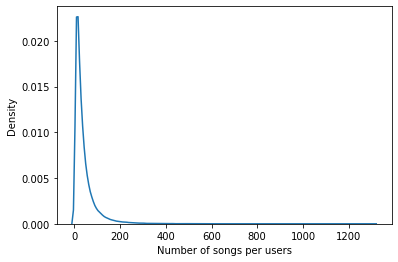

In [272]:
plt.xlabel('Number of songs per users')
sns.kdeplot(total_songs_per_user['listen_count'])
plt.show()

In [275]:
quotient = len(active_users)/unique_user_ids
percentage = quotient*100
print(percentage)

1.9900000000000002


* <b>1.99%</b> users listen a songs <b>more than 200</b> times
* <b>98%</b> users listen a songs <b>less than 200</b> times

## 5. Which Artists most liked by people?

In [279]:
artists = dataset.groupby(['artist_name']).sum()
artists.head()

,listen_count
artist_name,
!!!,325
!Deladap,8
& And Oceans,9
'68 Comeback,49
'N Sync/Phil Collins,344


In [280]:
unique_artist

28361

In [285]:
artists.sort_values('listen_count').head()

,listen_count
artist_name,
Özlem Tekin,1
Open Season,1
Open Your Eyes,1
Opgeduveld,1
Orange Tulip Conspiracy,1


In [286]:
artists.sort_values('listen_count').tail()

,listen_count
artist_name,
Florence + The Machine,28224
Coldplay,32135
Björk,35210
Dwight Yoakam,35688
Kings Of Leon,35857


In [299]:
famous_artists = artists.sort_values('listen_count').tail(105)
famous_artists

,listen_count
artist_name,
Cage The Elephant,5052
Natiruts,5069
Band Of Horses,5114
La Roux,5168
The Verve,5185
...,...
Florence + The Machine,28224
Coldplay,32135
Björk,35210


* 105 artists out of 28,361 artists has more than 5,000 listens on thier songs.

In [300]:
quotient = len(famous_artists)/unique_artist
percentage = quotient*100
print(percentage)

0.37022671979126265


* 0.37 percent artists has more than 5000 listening on thier songs

## 6. Which song of the artists people like?

In [72]:
artists = dataset.groupby(['artist_name', 'release']).sum()
artists.head(20)

listen_count
artist_name  release                                                   
!!!          A New Name                                              13
             All My Heroes Are Weirdos                               24
             Bend Over Beethoven                                     59
             Break In Case Of Anything                                7
             Heart Of Hearts                                          2
             Infinifold                                              14
             Must Be The Moon                                        17
             Myth Takes                                              18
             Sweet Life                                             149
             Yadnus                                                  22
!Deladap     Dela Paji                                                4
             Goldregen (N.O.H.A. Mix)                                 4
& And Oceans Aphelion: Light Evanescence: Into Extinction             8
             Odious And Devious                                       1
'68 Comeback A Little Bitch (And A Little Bitch Better)               1
             A Long Time Ago                                          1
             All Night Long                                           1
             Drinkin' Wine Spo-Dee-O-Dee                              1
             Eager Boy                                                1
             Flip Flop_ & Fly                                         1

# Insights

1. 0.23% songs has listen more than 1000 times (Called as a popular songs)
2. 90% of the songs is listen between 0-50 times.
3.
4. 98% users listen a songs less than 200 times.
5. 105 artists has more than 5000 listening on thire songs (0.37%)
6.